# Data Science Research Methods: Physical Activity Monitoring

## 1. Introduction

This report incorporates the PAMAP2 (Physical Activity Monitoring) dataset containing information regarding the physical exercises undertaken by participants. Data on the exercises undertaken include the timestamp, activity type, heart rate and the movement of hands, chest, and ankles using inertial measurement units (IMU). Using this dataset, this report aims to develop a reliable system which helps to predict the amount, and type of physical exercise a person completes. 

To achieve this goal, this report does the following:
- Data cleaning and exploratory data analysis
- Investigated the relationship between attribute 1 and attribute 2
- Developed and tested a model incorporating attributes... to predict the amount + type of exercise completed. 

### 1.1 Description about the dataset
<b>Participants</b>

A total of 9 participants (8 males and 1 female) were sampled for the dataset, some of which were either employees or DFKI students according to the readme file. The average age of participants was 27.22 years old, with an average BMI of 25.11 kgm-2. The maximum and minimum height of participants were 168 and 194 centimetres respectively. Moreover, the resting heart rate (beats per minute) ranged from 54 to 75 beats per minute and the overall maximum heart rate ranged from 188 to 197 beats per minute.

<b>Activities</b>

All subjects were asked to perform 12 different activities. Although they were given the option to complete other optional activities, this report will be mainly focusing on the activities described in the DataCollectionProtocol file. 



In [1]:
#Importing libraries and functions required for this report

##standard imports for when working with pandas
import numpy as np
#matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd

import random
import csv
import seaborn as sns
from scipy import stats
import scipy.stats as st
from matplotlib import ticker
import math

from sklearn.model_selection import train_test_split
!pip install nbconvert

## 2. Data preparation
As the original format of the data was merged into one file per subject, I've combined these separate files into one whole dataset to make data analysis more efficient.

In [2]:
#Participants 1-9 files
files=['subject101','subject102','subject103','subject104','subject105','subject106','subject107','subject108','subject109']

#Setting up column names
colNames = ["timestamp", "activityID","heartrate"]

IMUhand = ['handtemp', 
           'handacc16_1', 'handacc16_2', 'handacc16_3', 
           'handacc6_1', 'handacc6_2', 'handacc6_3', 
           'handgyro1', 'handgyro2', 'handgyro3', 
           'handmag1', 'handmag2', 'handmag3',
           'handorientation1', 'handorientation2', 'handorientation3', 'handorientation4']

IMUchest = ['chesttemp', 
           'chestacc16_1', 'chestacc16_2', 'chestacc16_3', 
           'chestacc6_1', 'chestacc6_2', 'chestacc6_3', 
           'chestgyro1', 'chestgyro2', 'chestgyro3', 
           'chestMag1', 'chestMag2', 'chestMag3',
           'chestorientation1', 'chestorientation2', 'chestorientation3', 'chestorientation4']

IMUankle = ['ankletemp', 
           'ankleacc16_1', 'anklaAcc16_2', 'ankleacc16_3', 
           'ankleacc6_1', 'ankleacc6_2', 'ankleacc6_3', 
           'anklegyro1', 'anklegyro2', 'anklegyro3', 
           'ankleMag1', 'ankleMag2', 'ankleMag3',
           'ankleorientation1', 'ankleorientation2', 'ankleorientation3', 'ankleorientation4']

#Combining all 54 columns
headernames = colNames + IMUhand + IMUchest + IMUankle 

for i in files:
    locals()["df"+"_"+str(i)] = pd.read_table(str(i)+".dat", 
                     header=None,
                     sep = "\s+",
                    )

In [3]:
dataset=[df_subject101,df_subject102,df_subject103,df_subject104,df_subject105,df_subject106,df_subject107,df_subject108,df_subject109]

#Merge all 9 subjects into one dataset
df_all = pd.concat(dataset)

df_all.columns = headernames
df_all

,timestamp,activityID,heartrate,handtemp,handacc16_1,handacc16_2,handacc16_3,handacc6_1,handacc6_2,handacc6_3,...,anklegyro1,anklegyro2,anklegyro3,ankleMag1,ankleMag2,ankleMag3,ankleorientation1,ankleorientation2,ankleorientation3,ankleorientation4
0,8.38,0,104.0,30.0000,2.37223,8.60074,3.51048,2.43954,8.76165,3.35465,...,0.008300,0.009250,-0.017580,-61.1888,-38.95990,-58.143800,1.000000,0.000000,0.000000,0.000000
1,8.39,0,NaN,30.0000,2.18837,8.56560,3.66179,2.39494,8.55081,3.64207,...,-0.006577,-0.004638,0.000368,-59.8479,-38.89190,-58.525300,1.000000,0.000000,0.000000,0.000000
2,8.40,0,NaN,30.0000,2.37357,8.60107,3.54898,2.30514,8.53644,3.73280,...,0.003014,0.000148,0.022495,-60.7361,-39.41380,-58.399900,1.000000,0.000000,0.000000,0.000000
3,8.41,0,NaN,30.0000,2.07473,8.52853,3.66021,2.33528,8.53622,3.73277,...,0.003175,-0.020301,0.011275,-60.4091,-38.76350,-58.395600,1.000000,0.000000,0.000000,0.000000
4,8.42,0,NaN,30.0000,2.22936,8.83122,3.70000,2.23055,8.59741,3.76295,...,0.012698,-0.014303,-0.002823,-61.5199,-39.38790,-58.269400,1.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8472,100.19,0,NaN,25.1875,-4.71493,10.22250,4.66893,-5.04654,9.94944,4.50736,...,-0.037788,-0.062676,-0.127084,-46.5153,3.58240,-0.035995,0.598531,0.033615,0.799791,-0.031075
8473,100.20,0,NaN,25.1875,-4.95932,10.37130,4.12594,-4.96890,10.29620,4.43102,...,-0.068904,-0.027006,-0.089808,-45.7474,3.54453,0.108583,0.598428,0.033012,0.799933,-0.030018
8474,100.21,0,NaN,25.1875,-4.93997,9.83615,3.70468,-5.04613,10.35690,4.14405,...,-0.070888,-0.038024,-0.064709,-46.3997,4.22078,0.105504,0.598233,0.033172,0.800095,-0.029416
8475,100.22,0,NaN,25.1875,-4.64941,9.11129,3.51904,-5.06854,9.75268,3.87359,...,0.018961,-0.025796,-0.064357,-46.5282,4.48593,0.530240,0.598116,0.033427,0.800180,-0.029208


## 2.1 Data Cleaning

Initially, the number of rows from our dataset was 2,872,533. However, upon data inspection, there were several things that were needed to be done to clean the dataset. Firstly, the removal of transient activities from the dataset was done as these were irrelevant activities that were being performed in between exercises, e.g., moving from one location to another location for another task. This was done to reduce unnecessary noise from our dataset. Regarding data from the accelerometer, only the device with the ±16g was kept as the readme file stated this was the most suitable over the accelerometer over 6g. The IMU orientation column was also discarded as the readme file stated this measurement was invalid. Additionally, missing values occurred due to the wireless measurements experiencing connection losses as stated in the readme file. To overcome this, I interpolated data, using the interpolate() function, to replace missing points with predicted values according to its surrounding data points.
After interpolating data points, the first 4 rows in the dataset contained missing values under the heart rate column. Therefore, these rows were removed. As a result, a total of 1,942,868 rows of clean dataset were left to be analysed.

In [4]:
#Checking length of original dataset
print("Length of original dataset: ", len(df_all)) # = 2,872,533 data

Length of original dataset:  2872533


In [5]:
#Checking for duplicated rows
#1. Checking for duplicated rows
df_all.duplicated().any() # False = No duplicates

False

In [6]:
#Checking if values are all the right data types
df_all.info() #All correct

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2872533 entries, 0 to 8476
Data columns (total 54 columns):
 #   Column             Dtype  
---  ------             -----  
 0   timestamp          float64
 1   activityID         int64  
 2   heartrate          float64
 3   handtemp           float64
 4   handacc16_1        float64
 5   handacc16_2        float64
 6   handacc16_3        float64
 7   handacc6_1         float64
 8   handacc6_2         float64
 9   handacc6_3         float64
 10  handgyro1          float64
 11  handgyro2          float64
 12  handgyro3          float64
 13  handmag1           float64
 14  handmag2           float64
 15  handmag3           float64
 16  handorientation1   float64
 17  handorientation2   float64
 18  handorientation3   float64
 19  handorientation4   float64
 20  chesttemp          float64
 21  chestacc16_1       float64
 22  chestacc16_2       float64
 23  chestacc16_3       float64
 24  chestacc6_1        float64
 25  chestacc6_2        fl

In [7]:
def datacleaning(dataset):
    clean_data = dataset[dataset.activityID != 0] #Discarding transient activities (irrelevant)
    #Discarding accelerometer 6g columns
    clean_data = clean_data.drop(columns=["handacc6_1", "handacc6_2",'handacc6_3','chestacc6_1','chestacc6_2','chestacc6_3','ankleacc6_1','ankleacc6_2',"ankleacc6_3"])
    #Discarding IMU orientation columns
    clean_data = clean_data.drop(columns=['handorientation1', 'handorientation2', 'handorientation3', 'handorientation4','chestorientation1', 'chestorientation2', 'chestorientation3', 'chestorientation4','ankleorientation1', 'ankleorientation2', 'ankleorientation3', 'ankleorientation4'])
    #Cleaning up NA values
    #Using interpolate() function to replace NA values with predicted values based on its two surrounding data points.
    clean_data = clean_data.interpolate()
    
    return clean_data

clean_df = datacleaning(df_all)
clean_df

,timestamp,activityID,heartrate,handtemp,handacc16_1,handacc16_2,handacc16_3,handgyro1,handgyro2,handgyro3,...,ankletemp,ankleacc16_1,anklaAcc16_2,ankleacc16_3,anklegyro1,anklegyro2,anklegyro3,ankleMag1,ankleMag2,ankleMag3
2928,37.66,1,NaN,30.375,2.21530,8.27915,5.58753,-0.004750,0.037579,-0.011145,...,30.75,9.73855,-1.84761,0.095156,0.002908,-0.027714,0.001752,-61.1081,-36.863600,-58.369600
2929,37.67,1,NaN,30.375,2.29196,7.67288,5.74467,-0.171710,0.025479,-0.009538,...,30.75,9.69762,-1.88438,-0.020804,0.020882,0.000945,0.006007,-60.8916,-36.319700,-58.365600
2930,37.68,1,NaN,30.375,2.29090,7.14240,5.82342,-0.238241,0.011214,0.000831,...,30.75,9.69633,-1.92203,-0.059173,-0.035392,-0.052422,-0.004882,-60.3407,-35.784200,-58.611900
2931,37.69,1,NaN,30.375,2.21800,7.14365,5.89930,-0.192912,0.019053,0.013374,...,30.75,9.66370,-1.84714,0.094385,-0.032514,-0.018844,0.026950,-60.7646,-37.102800,-57.879900
2932,37.70,1,100.0,30.375,2.30106,7.25857,6.09259,-0.069961,-0.018328,0.004582,...,30.75,9.77578,-1.88582,0.095775,0.001351,-0.048878,-0.006328,-60.2040,-37.122500,-57.884700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7959,95.06,24,162.0,25.125,4.99466,6.01881,5.59830,-0.289166,-0.110170,0.238570,...,31.50,9.40727,-2.24401,-2.259740,0.021288,-0.012885,0.005878,-45.7855,-0.831734,-0.170139
7960,95.07,24,162.0,25.125,5.02764,5.90369,5.48372,-0.275411,-0.128358,0.267409,...,31.50,9.36745,-2.28110,-2.337100,0.010715,0.003629,-0.004235,-46.0331,-0.817288,0.538134
7961,95.08,24,162.0,25.125,5.06409,5.71370,5.48491,-0.289885,-0.126548,0.281483,...,31.50,9.36765,-2.24313,-2.337340,-0.016939,-0.035176,-0.002309,-45.5140,-1.229410,0.540438
7962,95.09,24,162.0,25.125,5.13914,5.63724,5.48629,-0.234417,-0.101485,0.275497,...,31.50,9.44470,-2.24425,-2.259360,-0.028069,-0.036457,-0.007076,-45.9093,-0.565555,0.680109


In [8]:
#Checking unique values within the activityID column
clean_df['activityID'].unique() #only lying,  sitting,  standing, ironing, vacuum cleaning, ascending stairs, descending stairs,  walking,  Nordic walking,  cycling,  running, rope jumping
clean_df['activityID'].nunique() #12 exercises

12

In [9]:
#Counting NA values in each column
for column in clean_df:
    print("Number of NA values in", column, "column: ", clean_df[column].isna().sum())
    
#Heart rate still has 4 NA values 

Number of NA values in timestamp column:  0
Number of NA values in activityID column:  0
Number of NA values in heartrate column:  4
Number of NA values in handtemp column:  0
Number of NA values in handacc16_1 column:  0
Number of NA values in handacc16_2 column:  0
Number of NA values in handacc16_3 column:  0
Number of NA values in handgyro1 column:  0
Number of NA values in handgyro2 column:  0
Number of NA values in handgyro3 column:  0
Number of NA values in handmag1 column:  0
Number of NA values in handmag2 column:  0
Number of NA values in handmag3 column:  0
Number of NA values in chesttemp column:  0
Number of NA values in chestacc16_1 column:  0
Number of NA values in chestacc16_2 column:  0
Number of NA values in chestacc16_3 column:  0
Number of NA values in chestgyro1 column:  0
Number of NA values in chestgyro2 column:  0
Number of NA values in chestgyro3 column:  0
Number of NA values in chestMag1 column:  0
Number of NA values in chestMag2 column:  0
Number of NA valu

In [10]:
#Only heartrate has 4 NA values. As we can never be sure the exact value of heartrate for this data, rows with heartrate of NA will be removed.
clean_df = clean_df.dropna() #Dropped 4 rows
clean_df

print("Final sample of clean dataset: ", len(clean_df))

Final sample of clean dataset:  1942868


In [11]:
#Total number of data removed.
len(df_all) - len(clean_df)

929665

## 3. Exploratory Data Analysis

### 3.1 Splitting the PAMAP2 dataset into training and testing set

Before performing exploratory data analysis, splitting the dataset into training and testing set is essential to avoid  overfitting models. It's also helpful in avoiding biases that arise from preconceptions gained from looking at the data itself. The decision to split the dataset is applicable in this report due to the large sample size it constitutes. The data split ratio used for this report is 50:50 (50% for the training dataset and 50% for the development set).

In [12]:
#storing header row to add back to the split data set for later
clean_df_headerrows = list(clean_df.columns.values)

#Creating new file without header row to avoid header row shuffling
clean_df_noheader = clean_df.rename(columns=clean_df.iloc[0]).drop(clean_df.index[0])

#Converting file into a list of lists before splitting data
clean_df_noheader_list = clean_df_noheader.values.tolist()
clean_df_noheader_list

#Splitting our data into development and training sets using 50:50 ratio
random.seed(30) #initialising random number
random.shuffle(clean_df_noheader_list)
midpoint=len(clean_df_noheader_list)//2
training_set=clean_df_noheader_list[:midpoint]
testing_set=clean_df_noheader_list[midpoint:]

#Adding back column names
training=pd.DataFrame(training_set, columns = clean_df_headerrows) 
testing=pd.DataFrame(testing_set, columns = clean_df_headerrows)

print(len(training))
print(len(testing))


971433
971433


In [13]:
#Descriptive statistics
training.describe()

,timestamp,activityID,heartrate,handtemp,handacc16_1,handacc16_2,handacc16_3,handgyro1,handgyro2,handgyro3,...,ankletemp,ankleacc16_1,anklaAcc16_2,ankleacc16_3,anklegyro1,anklegyro2,anklegyro3,ankleMag1,ankleMag2,ankleMag3
count,971433.000000,971433.000000,971433.000000,971433.000000,971433.000000,971433.000000,971433.000000,971433.000000,971433.000000,971433.000000,...,971433.000000,971433.000000,971433.000000,971433.000000,971433.000000,971433.000000,971433.000000,971433.000000,971433.000000,971433.000000
mean,1705.800111,8.083154,107.495615,32.750734,-4.950945,3.582827,3.600887,0.002480,0.040095,-0.002770,...,33.711028,9.401303,-0.152307,-2.595982,0.010318,-0.035784,0.007647,-31.594598,1.400907,17.237282
std,1093.941672,6.176465,26.999490,1.794381,6.243026,6.886677,3.948088,1.329932,0.955049,1.598647,...,1.093803,6.521538,7.763355,3.925498,1.125325,0.637136,2.009311,18.335027,21.696944,19.726573
min,31.210000,1.000000,57.000000,24.875000,-145.367000,-90.722400,-73.949700,-20.813000,-9.949150,-14.264700,...,30.000000,-155.068000,-157.443000,-157.245000,-23.995000,-18.126900,-12.977400,-172.865000,-137.549000,-96.558500
25%,744.570000,3.000000,86.000000,31.687500,-8.967380,1.059380,1.159180,-0.377891,-0.223145,-0.385877,...,33.000000,8.422530,-2.177050,-3.813720,-0.208786,-0.106114,-0.440471,-41.719900,-12.470500,3.716740
50%,1481.280000,6.000000,104.000000,33.125000,-5.452020,3.529620,3.428570,-0.005977,0.006043,-0.005612,...,34.062500,9.536620,-0.296315,-2.420250,0.004679,-0.003921,-0.002290,-34.015700,0.766787,18.739900
75%,2664.500000,13.000000,124.000000,34.062500,-0.951438,6.455420,6.529180,0.335927,0.268071,0.366928,...,34.500000,10.286500,1.776910,-1.045810,0.131611,0.116445,0.092378,-17.907900,17.850100,31.223300
max,4245.680000,24.000000,202.000000,35.500000,62.859600,155.699000,108.996000,22.960000,16.917100,14.326700,...,35.437500,157.232000,157.293000,158.872000,17.420400,12.950900,16.528800,91.551600,94.247800,146.900000


In [14]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 971433 entries, 0 to 971432
Data columns (total 33 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   timestamp     971433 non-null  float64
 1   activityID    971433 non-null  float64
 2   heartrate     971433 non-null  float64
 3   handtemp      971433 non-null  float64
 4   handacc16_1   971433 non-null  float64
 5   handacc16_2   971433 non-null  float64
 6   handacc16_3   971433 non-null  float64
 7   handgyro1     971433 non-null  float64
 8   handgyro2     971433 non-null  float64
 9   handgyro3     971433 non-null  float64
 10  handmag1      971433 non-null  float64
 11  handmag2      971433 non-null  float64
 12  handmag3      971433 non-null  float64
 13  chesttemp     971433 non-null  float64
 14  chestacc16_1  971433 non-null  float64
 15  chestacc16_2  971433 non-null  float64
 16  chestacc16_3  971433 non-null  float64
 17  chestgyro1    971433 non-null  float64
 18  ches

### 3.2 Relationship between heart rate and type of physical activity performed

Regarding the investigation between two attributes, heart rate was chosen as one of the variables of interest which indicates the overall intensity of an exercise. According to our descriptive statistics, heart rate ranges from 52 seconds to 202 seconds, along with an average heart rate of 107.5 seconds. Data distribution of heart rate is outlined in figure 1 below where we can also see outliers beyond 180 beats per minute.

Text(0, 0.5, 'Heart rate (BPS)')

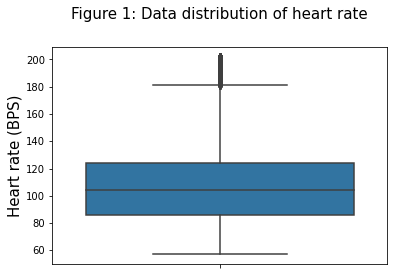

In [15]:
boxplot=sns.boxplot(y=training["heartrate"])
plt.rcParams['figure.figsize'] = (5,5)
plt.title("Figure 1: Data distribution of heart rate", y=1.1, fontsize = 15)
boxplot.set_ylabel("Heart rate (BPS)", fontsize=15)

In Figure 2 below, the data distribution of heartrate shows to be positively skewed meaning the mean heartrate is higher than the median value heart rate. Thus, due to outliers and non-symmetric distribution of heart rate values, heart rate will need to be standardised during hypothesis testing. 

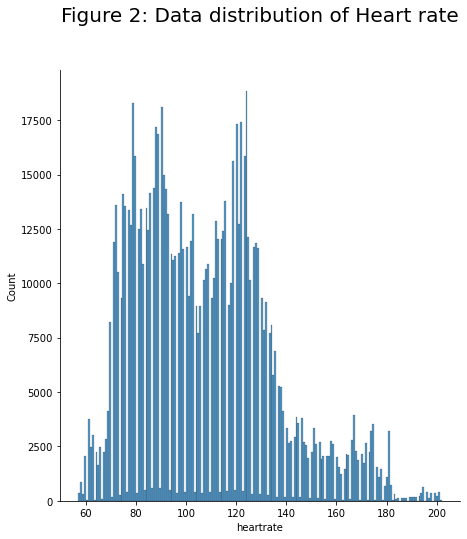

In [16]:
#Data distribution for heartrate
heartrate_distribution = sns.displot(training['heartrate'])
heartrate_distribution.figure.set_figwidth(7)
heartrate_distribution.figure.set_figheight(7)
plt.title("Figure 2: Data distribution of Heart rate", y=1.1, fontsize = 20)
plt.show()

In figure 3 below, I've also created another boxplot which displays the heart rate data distribution according to activity type. We can see that activity 24 (rope jumping) followed by activity 5 (running) are the top two most intense exercise according to our dataset. Meanwhile, activities 1-3 (lying, sitting, and standing) had the lowest heart rates. 

Text(0, 0.5, 'Heartrate')

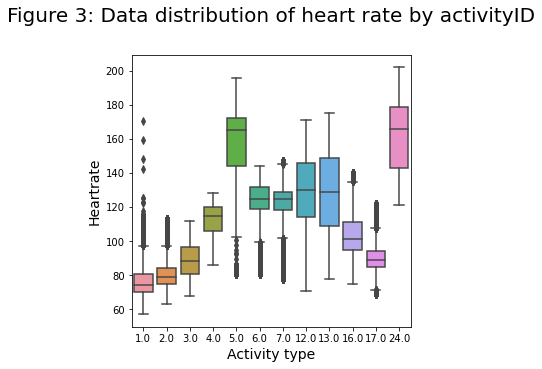

In [17]:
boxplot2 = sns.boxplot(x='activityID', y='heartrate', data=training)
plt.title("Figure 3: Data distribution of heart rate by activityID", y=1.1, fontsize = 20)
plt.rcParams['figure.figsize'] = (13,13)
boxplot2.set_xlabel("Activity type", fontsize=14)
boxplot2.set_ylabel("Heartrate", fontsize=14)

Figure 4 below also shows a heatmap to identify any correlations between potential variables of interest. Here, timestamp (in seconds) correlates highly with heart rate. This makes sense since the longer a person performs an exercise, specifically high intensity activities like running and rope jumping, heart rate is bound to increase to ensure the body gets enough oxygen for the body to continue performing.

/var/folders/93/lbqtsnbx0vxckcjq89xh03tw0000gn/T/ipykernel_16196/1446327512.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(correlation_matrix, mask=np.zeros_like(correlation_matrix, dtype=np.bool), cmap = "BrBG",ax=ax)


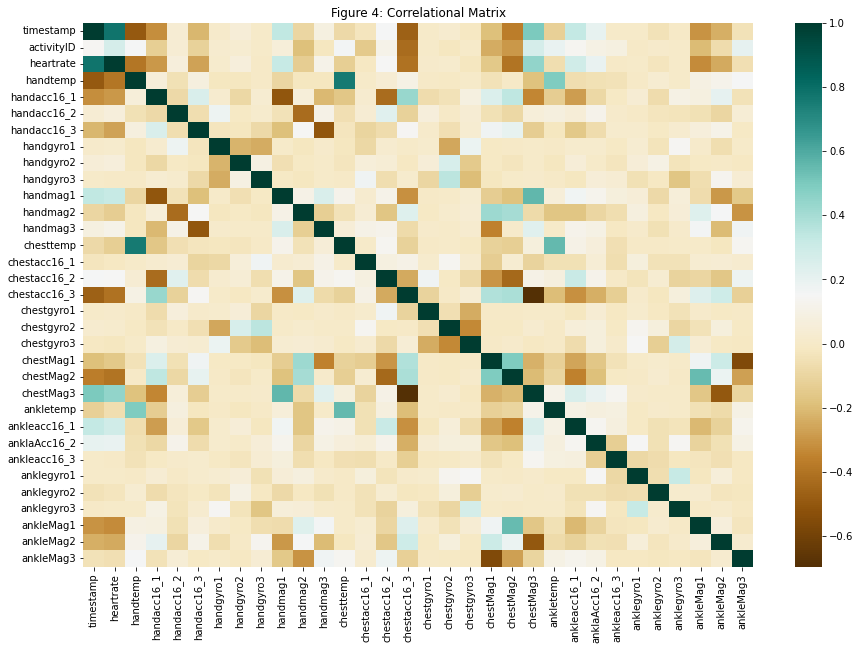

In [18]:
from pandas.plotting import scatter_matrix
correlation_matrix = training.corr()
correlation_matrix = correlation_matrix.drop(['activityID'], axis = 1)

f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(correlation_matrix, mask=np.zeros_like(correlation_matrix, dtype=np.bool), cmap = "BrBG",ax=ax)
ax.set_title('Figure 4: Correlational Matrix')
plt.show()

## 4. Hypothesis Testing

Activity 5 (running) and 24 (rope jumping) both have a common feature of being a locomotor movement. Locomotor movements refers to the movement of the body to one or many directions as a typical definition from the web. Does this mean activities incorporating locomotor movement will be associated with higher heartrate?

To investigate this, I've divided the activity type into two categories (Locomotor exercises and non-locomotor exercises). The mean heart rate of these two categories will be compared. I've distinguished these activities according to whether it falls within the general definition of a locomotor movement. 

### Locomotor exercises:
- Walking
- Running
- Cycling
- Nordic Walking
- Ascending and Descending the stairs
- Vacuuming 
- Ironing
- Rope Jumping

### Non-locomotor exercises:
- Lying
- Sitting
- Standing

Based on my exploratory data analysis, I have constructed two predictions:

<b>1. Null hypothesis</b>: The mean heart rate from locomotor exercises will not be significantly different to the mean heart rate of the non-locomotor exercises. 

<b>2. Alternative hypothesis</b>: If heart rate is associated with locomotor exercises, then the mean heart rate of the locomotor exercises will be significantly higher than the mean heart rate in the non-locomotor exercises.


## 4.1 Is there a difference in heart rate when performing locomotor Vs non-locomotor activities?

For this hypothesis testing, a Z-test was chosen as the sample size of locomotor (687,724) and non-locomotor activities (283,709) both exceed the threshold sample size of 30. Firstly, the mean, standard deviation, and the sample size of heart rate in both locomotor and non-locomotor activities were obtained. The difference in mean heart rate of both types of activities were calculated which resulted into 36.91 beats per minute (2 decimal places). Mean heart rate difference was then converted into a standardised normal distribution value of 0.03 (two decimal places). For hypothesis testing, significance level of 0.05 was specifically chosen as this level is the standard level to distinguish between significant and non-significant results (Di Leo & Sardanelli, 2020). Following the Z-test under the assumption of my null hypothesis, a p-value of 0.0 was obtained. As our p-value was below our significance level of 0.05, we can reject the null hypothesis and accept the alternative hypothesis whereby heart rate is associated with locomotor exercises. Moreover, having a p-value of 0.0 means there's approximately 0% chance that results occurred randomly.

In [19]:
#Obtaining means, std, number of loco and non-locomotor exercise heart rate

#Locomotor exercises only
Locomotor_data = testing.loc[testing['activityID'].isin([4, 5, 6,7,12,13,16,17,24])]
Locomotor_data

#Locomotor exercise mean heart rate, std heart rate, count.
Locomotor_means=Locomotor_data['heartrate'].mean()
Locomotor_std=Locomotor_data['heartrate'].std()
Locomotor_count=Locomotor_data['heartrate'].count()


#non-locomotor exercises only
nonLocomotor_data = testing.loc[testing['activityID'].isin([1,2,3])]
nonLocomotor_data

#Non-locomotor exercise mean heartrate, std heartrate, count
nonLocomotor_data_means=nonLocomotor_data['heartrate'].mean()
nonLocomotor_data_std=nonLocomotor_data['heartrate'].std()
nonLocomotor_data_count=nonLocomotor_data['heartrate'].count()

#Mean heartrate difference 
mean_diff = Locomotor_means - nonLocomotor_data_means
print("mean heartrate diff: ", mean_diff)

print("Loco sample size: ", Locomotor_count)
print("nonLoco sample size :", nonLocomotor_data_count)

#function for performing z-test
def z_test(mean1,mean2,std1,std2,count1,count2):
    mean_diff = mean1 - mean2 #Mean difference between locomotor and non-locomotor exercises
    total_error = (((std1**2)/count1) + (std2**2)/count2)**0.5 #Total standard error
    z_score = mean_diff/total_error 
    p_value = (1-stats.norm.cdf(z_score))
    
    if p_value >= 0.05:
        print("Significant difference in heart rate")
        print("Z-value = ", z_score)
    else:
        print("No significant difference in heart rate")
        print("Z-value = ", z_score)

z_test(Locomotor_means,
       nonLocomotor_data_means,
       Locomotor_std,
       Locomotor_count,
       nonLocomotor_data_std,
       nonLocomotor_data_count)


mean heartrate diff:  36.910823117702094
Loco sample size:  687724
nonLoco sample size : 283709
Significant difference in heart rate
Z-value =  0.02858704430725511


## 5. Modelling using supervised learning

In [20]:
#Importing necessary libraries
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import preprocessing
from sklearn import utils
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

### 5.1 Multiple Linear Regression model for determining the amount of activity participants completed

Multiple linear regression was used to predict the amount of exercises undertaken by participants. The amount of activity completed was operationalised using heart rate since a person's heart rate tends to increase the more exercises they do, thus reflecting the amount of physical activity done.
Feature selection for this linear model was implemented by determining attributes of the dataset that moderately correlated with heart rate. A threshold of 0.4 Pearson's correlation coefficient was chosen which is indicative of a moderate correlation (theBMJ, 2020). Heart rate was correlated against all other attributes within the data, resulting in 4 features being selected for having a correlation coefficient of above 0.4: timestamp (0.78), chestacc16_3 (0.41), chestMag2(0.40), and chestMag3(0.45)
Once the linear regression model was fitted onto the training dataset, this was used to make heart rate predictions in the testing dataset. These heart rate predictions were then compared to the actual heart rate predictions in the testing dataset. To examine the goodness of fit model derived from the training dataset, the root mean squared error (RMSE) was calculated. Resultingly, the average difference between predicted and real values in the testing dataset is 16.36.

In [21]:
#Determining which features to extract: use Pearson's correlation to determine variables that correlate with heart rate

#Correlation with output variable
cor = training.corr()
cor_target = abs(cor["heartrate"])

#Selecting highly correlated features with heartrate 
relevant_features = cor_target[cor_target>0.4] #threshold of 0.4 is chosen to extract attributes that moderately correlate with heart rate according to https://www.bmj.com/about-bmj/resources-readers/publications/statistics-square-one/11-correlation-and-regression 
relevant_features #timestamp, chestacc16_3, chestMag2, chestMag3

timestamp       0.781273
heartrate       1.000000
chestacc16_3    0.410281
chestMag2       0.403902
chestMag3       0.449618
Name: heartrate, dtype: float64

In [22]:
#Creating the multiple linear regression model

#Setting up x and y variables (training)
x_obs_train = training[['timestamp','chestacc16_3','chestMag2','chestMag3']]
y_obs_train = training['heartrate']

#Setting up x and y variables (testing)
x_obs_test = testing[['timestamp','chestacc16_3','chestMag2','chestMag3']]
y_obs_test = testing['heartrate']

# creating an object of LinearRegression class
LR = LinearRegression()

# fitting the training data
LR.fit(x_obs_train,y_obs_train)

#making predictions
heartrate_prediction = LR.predict(x_obs_test)
print(heartrate_prediction)

#Calculating goodness of fit model to see the distances between predicted and observed data points using root mean squared error
MSE = mean_squared_error(testing['heartrate'], heartrate_prediction)
print('Mean squared error of linear model: ', MSE)

#Goodness of fit RMSE measurement chosen over MSE as RMSE since its unit of measurement is easily translated to the unit of measurement of heart rate.
RMSE = MSE**0.5
print('Root mean squared error of linear model: ',RMSE)



[ 96.03830735  71.01991435 129.97482335 ...  97.51472068  71.04039643
 129.94008898]
Mean squared error of linear model:  267.65983180133287
Root mean squared error of linear model:  16.36031270487618


### 5.2 Logistics Regression Model for determining the type of physical activity performed

A Logistics regression model was used as this model operates on the dependent variable having binary outputs or being a categorical variable. Since I'm interested in determining the type of activity performed, the dependent variable will be categorical. Therefore, as in section 4 (hypothesis testing), a new attribute was created in the dataset whereby activity was converted into dummy variables: non-locomotor (0) and locomotor exercises (1).
As timestamp, chestacc16_3, chestMag2, and chestMag3 were moderately correlated with heart rate, these features were chosen for logistics regression model. Heart rate was also chosen as there was a significant difference in mean heart rate between locomotor and non-locomotor exercises. Numerical variables such as timestamp, heartrate, chestacc16_3, chestMag2, and chestMag3 were normalised to ensure these features are comparable on the same scale. This helps avoid larger scales from certain feature(s) affecting the rest of the model.
Next, the logistics model was derived from the training dataset and was used to predict the activity type in the testing dataset.

In [23]:
#creating new attribute for the dataset (type of activity). 0 = non-locomotor. 1 = locomotor 
#creating list of columns and values
#Logistics regression used for binary classification --> loco vs non-locomotor exercises

#Setting up training dataset
intensity_column = [(training['activityID']==1),(training['activityID']==2),(training['activityID']==3),(training['activityID']==17),
                   (training['activityID']==16),(training['activityID']==13),(training['activityID']==4),(training['activityID']==7),(training['activityID']==6),
                   (training['activityID']==24),(training['activityID']==5),(training['activityID']==12)]

intensity_col_values = [0,0,0,1,
                       1,1,1,1,1,
                       1,1,1]

training['activity_type'] = np.select(intensity_column, intensity_col_values)
training



#Setting up testing dataset
testing['activity_type'] = np.select(intensity_column, intensity_col_values)
testing


#Scaling numerical variables - numerical variables need to be scaled to be able to compare various features on the same basis - larger scales of one feature won't affect the rest of the model.
selected_features = ['timestamp','heartrate','chestacc16_3','chestMag2','chestMag3'] #List of features we're interested in

scaler = StandardScaler()
scaler.fit(training[selected_features])
categorical_y = ['activity_type']


def get_features_and_target_arrays(training, selected_features, categorical_y, scaler):
    selected_features_scaled = scaler.transform(training[selected_features]) #standardisation of numerical variables
    X_categorical = training[categorical_y].to_numpy() #Converting categorical variable (activity_type) into array
    X = np.hstack((X_categorical, selected_features_scaled)) 
    y = training['activity_type']
    return X, y

#training
X_train, y_train = get_features_and_target_arrays(training, selected_features, categorical_y, scaler)

#testing
X_test, y_test = get_features_and_target_arrays(testing, selected_features, categorical_y, scaler)



To evaluate the overall fit of this model, the precision, recall, and f1 score metrics were calculated. Resultingly, a precision value of 1.0 for non-locomotor exercises  indicates that out of all the exercises that the model predicted to be a non-locomotor exercise, 100% were correctly predicted to be a non-locomotor movement. Meanwhile, a precision value of 0.91 indicates that out of all the locomotor exercises predicted by the model, 91% of them were predicted correctly. 

Regarding f1-score, values of 0.86 and 0.95 for non-locomotor and locomotor exercises respectively indicates that the model developed has good predictive performance as it's close to 1. 

In [24]:
# https://towardsdatascience.com/logistic-regression-a-simplified-approach-using-python-c4bc81a87c31 
# https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

#Training logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_prediction = log_reg.predict(X_test)
#print(y_prediction)


#Evaluating classification model: Accuracy, precision, recall
print("Performance of logistic regression on testing dataset")
print(classification_report(y_test, y_prediction))


Performance of logistic regression on testing dataset
              precision    recall  f1-score   support

           0       1.00      0.76      0.86    283928
           1       0.91      1.00      0.95    687505

    accuracy                           0.93    971433
   macro avg       0.95      0.88      0.91    971433
weighted avg       0.94      0.93      0.93    971433



## 6. Summary

In summary, this report aimed to develop a hypothesis and test the relationship between heart rate and locomotor exercises. Based on exploratory data analysis, I predicted that locomotor exercises will have a significantly higher heart rate than non-locomotor exercises due to its high intensity. This hypothesis was tested by calculating the mean heart rate difference between locomotor and non-locomotor exercises. Results of this test confirmed that locomotor exercises were indeed associated with increased heart rate. However, cautious should be taken from this as heart rate can affected by other factors external from exercising, e.g., nervousness or even anxiety. To control for these extraneous variables, further data collection which implements participant screening can be done to control for a participant's mental state.


This report also aimed to develop a reliable system which helps to predict the amount of exercise (using heart rate) and type of physical exercise a person completes (locomotor vs non-locomotor exercises). Here, a logistics regression model was developed with the goal of predicting whether the exercise performed was locomotor or non-locomotor using heart rate, duration, chest acceleration, and chest magnetometer data. The performance of this model was also evaluated which resulted in good levels of accuracy. However, the uneven sample of male and female participants means our model may be good at predicting the amount and type of exercises performed by males as opposed to both males and females. Hence, further data collection should incorporate more female participants to be able to reliably predict the amount, and type of exercises performed by males and females.




## References

Correlation and regression | The BMJ. (2020, October 28). The BMJ | The BMJ: Leading General Medical Journal. Research. Education. Comment. https://www.bmj.com/about-bmj/resources-readers/publications/statistics-square-one/11-correlation-and-regression


Di Leo, G., & Sardanelli, F. (2020). Statistical significance: P value, 0.05 threshold, and applications to radiomics—reasons for a conservative approach. European Radiology Experimental, 4(1), 18. https://doi.org/10.1186/s41747-020-0145-y


